<a href="https://colab.research.google.com/github/redhyppo/MAIMLF2020/blob/master/LC1_2020_NB_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecniche di Gradient Descent 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Informazioni:

scopo: fare pratica con l'uso della tecnica di discesa lungo il gradiente e delle tecniche associate (momentum, ADAM, RMSProp, ...) per lo studio dei minimi di funzioni bidimensionali.

**Prima parte: visualizzazione grafica delle funzioni**

In [0]:
# setup delle funzioni di visualizzazione di base usate successivamente

# configura matplotlib in modo che l'output sia in linea con il codice delal cella del notebook che lo ha 
# prodotto e sia salvato con il notebook stesso
%matplotlib inline

#importa le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
# 3D plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm


#funzioni per plottare
def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r", xlimL=1, xlimH=1, ylimL=1, ylimH=1, zlimL=2, zlimH=2):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-xlimL, xlimH)
    ax.set_ylim(-ylimL, ylimH)
    ax.set_zlim(-zlimL, zlimH)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

**definizione delle funzioni da studiare**

funzioni studiate:

* funzione con minimo quadratico: $$z=ax^2+by^2,$$

* fuzione con un punto di sella: $$z=ax^2-by^2,$$

* funzione convessa di Beale: $$z = (1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2$$ con minimo in $$(\hat{x},\hat{y})=(3,0.5)$$

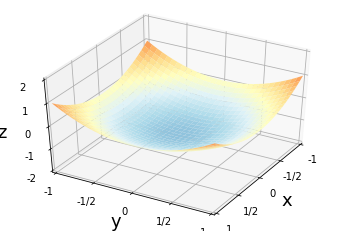

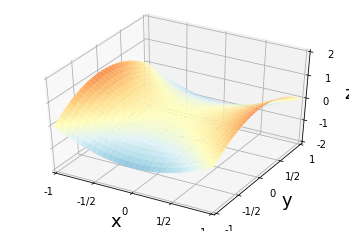

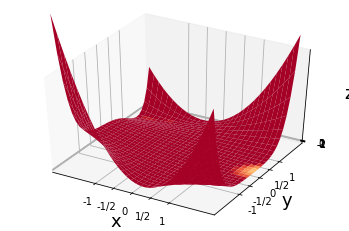

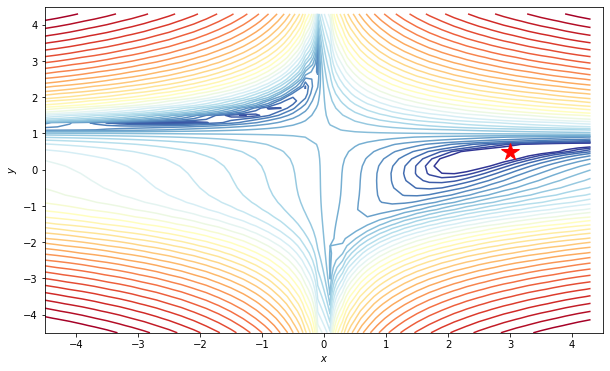

In [0]:
#funzione con minimo quadratico
def minima_surface(x,y,a=1,b=1):
    return a*x**2+b*y**2-1      #il -1 viene inserito perché altrimenti non si vede bene il plot, per come sono definite le funzioni di plot

#gradiente analitico
def grad_minima_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]


#funzione con punto di sella
def saddle_surface(x,y,a=1,b=1):
    return a*x**2-b*y**2

#gradiente analitico
def grad_saddle_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= -2*b*y
    return [grad_x,grad_y]


#funzione di Beale
def beales_function(x,y):
    return np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

#gradiente analitico
def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

#contour plot della funzione di Beale
def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax
    
#plot delle superfici
plt.close() # chiudi qualsiasi plot precedente
x, y = np.mgrid[-1:1:31j, -1:1:31j] 
fig1,ax1=plot_surface(x,y,minima_surface(x,y,1),30)
fig2,ax2=plot_surface(x,y,saddle_surface(x,y))
x, y = np.mgrid[-2:2:31j, -2:2:31j] 
fig3,ax3=plot_surface(x,y,beales_function(x,y),xlimL=2.1, xlimH=2.1, ylimL=2.1, ylimH=2.1, zlimL=0,zlimH=300)

#Contour plot della funzione di Bale
fig4,ax4 =contour_beales_function()
plt.show()

## Parte 2: discesa lungo il gradiente con e senza momentum




In this notebook, we will visualize various gradient descent algorithms used in machine learning. We will be especially interested in trying to understand how various hyperparameters -- especially the learning rate -- affect our performance. Here, we confine ourselves primarily to looking at the performance in the absence of noise. However, we encourage the reader to experiment with playing with the noise strength below and seeing what differences introducing stochasticity makes. 

Throughout, we denote the parameters by $\theta$ and the energy function we are trying to minimize by $E(\theta)$.

<b>Gradient Descent</b>

primo passo: implementazione di una semplice discesa lungo il gradiente, in cui dato un set di parametri $w$, questi vengono aggiornati ad ogni iterazione nella direzione del gradiente locale:

$$\w_{t+1}= w_t - \eta_t \nabla_w E(w),$$

in cui $E(w)$ rappresenta la funzione (energia nel linguaggio della fisica) che vogliamo minimizzare.

Il parametro $\eta_t$ (lerning rate) controlla la larghezza di ciascuno step. In generale l'algoritmo è estremamente sensibile al valore di $\eta_t$, se è troppo grande possono comparire grandi oscillazioni intorno al minimo (perdendo controllo sulle strutture a piccola scala della funzione). Il problema diventa sempre più grande quanto più rumore è presente nelle stime del gradiente (come succede nel ML in cui il gradiente viene cacolato su campioni di eventi di dimensione limitata). Se $\eta_t$ è troppo piccola la porcedura di ottimizzazione diviene estremamente lenta.


<b>Gradient Descent + Momentum</b>

Aggiungere informazione su cosa è successo nelle iterazioni precedenti ("da dove proviene la palla che rotola giù dalla collina") aiuta ad evitare problemi con minimi locali sopratutto in presenza di rumore stocastico.
Questo può essere fatto aggiungendo un termine di memoria o momentum che permette sia di riuscire ad uscire da minimi locali, sia di non reagire in modo esagerato ai cambiamenti presenti ad ogni nuova iterazione.
La regola di update diviene:

$$
v_{t}=\gamma v_{t-1}+\eta_{t}\nabla_w E(w_t),\\
w_{t+1}= w_t -v_{t},
$$

in cui $0\le \gamma < 1$ è un parametro detto momentum. Quando $\gamma=0$ si riottiene il GD ordinario, aumentando 
$\gamma$ aumenta il contributo di inerzia al gradiente.

In [0]:
#implementazione funzioni GD e GD+momentum
# nota viene introdotta la possibilità di aggiungere una componente rumorosa al calcolo del gradiente per simulare 
# l'effetto nell'uso del ML con campioni di dimensione finita

#GD
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


#GD + momentum
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

# Applicazione di GD e GD+momentum

Applichiamo l'algoritmo alla funzione con minimo quadratico $z=ax^2+by^2-1$ con ($a=b=1$).

**Cosa si vuole testare:**
* dipendenza dal learning rate: $\eta=0.1,0.5,1,1.01$;
* dipendenza dai parameri della funzione.

**Da fare come esercizio:**
* cosa cambia cambiando i parametri $a$ e $b$ della funzione? Funzioni anisotrope presentano lo stesso comportamento?
* provare cosa cambia usando GD_momentum. Come cambia la dipendenza da $\eta$ rispetto al caso senza momentum?

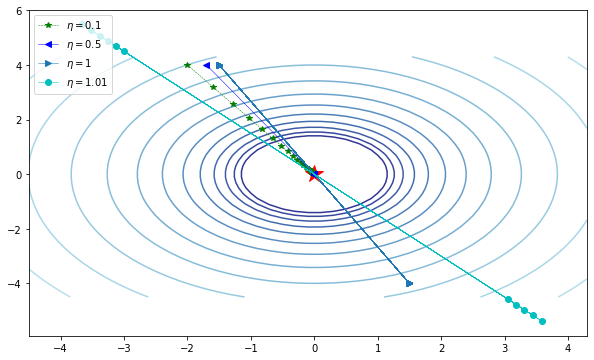

In [0]:
# studio effetto learnign rate in GD
plt.close()
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))

a,b = 1.5,1.0 #were 1,1
z=np.abs(minima_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,4] 
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3,4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01
gd_1=gd(grad_minima_surface,init1, n_epochs=100, eta=eta1)
gd_2=gd(grad_minima_surface,init2, n_epochs=100, eta=eta2)
gd_3=gd(grad_minima_surface,init3, n_epochs=100, eta=eta3)
gd_4=gd(grad_minima_surface,init4, n_epochs=10, eta=eta4)
print(gd_4)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
fig.savefig("NB_GD_plot1.pdf", bbox_inches='tight')



## Tecniche GD con uso di learning rate adattivi: RMSProp, ADAM

Il learning rate è fissato dalla direzione più ripida del landscape della funzione da minimizzare, ma questa può cambiare a seconda del punto locale in cui ci troviamo. Per aggirare questo problema, idealmente dovremmo scegliere di dare grandi step nelle direzioni che corrispondono a zone piatte del landskape energetico e piccoli passi in direzioni ripide e strette. I cosidetti metodi del secondo ordine ottengono questo risultato calcolando o approssimando l'Hessiano e normalizzando il learning rate con la curvatura della superficie nell'intorno del punto in cui ci si trova. Questi metodi tuttavia sono molto costosti dal punto di vista computazionale specie per modelli con un grande numero di parametri e quindi in pratica non sono applicabili. Sono stati quindi introdotti numerosi metodi che consentono in modo computazionalmente efficiente di adattare il learning rate seguendo il gradiente ed il momento secondo del gradiente stesso. Metodi di questo tipo includono AdaGrad, AdaDelta, RMSProp e ADAM. 

* Esempio: RMSProp (Root-Mean-Square propagation)

durante le iterazioni oltre a tenere in memoria il momento primo del gradiente attraverso una media mobile (running average), viene anche tenuta memoria del momento secondo. La regola di aggiornamento è data da:

$$
\mathbf{g}_t = \nabla_w E(\boldsymbol{w}) \\
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber \\
\boldsymbol{w}_{t+1}=\boldsymbol{w}_t + \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber \\
$$

con $\beta$ parametro che controlla il tempo di media del momento secondo (tipicamente $\beta\sim 0.9$), e 
$\eta_t$ learning rate (tipicamente $\sim 10^{-3}$) e $\epsilon\sim 10^{-8}$ una piccola costante che serve ad evitare divergenze.

Si vede come il learning rate è ridotto nelle direzioni in cui la norma del gradiente è costantemente ampia. Ciò accelera notevolmente la convergenza consentendoci di utilizzare un tasso di apprendimento più ampio per direzioni piatte.

* Esempio: ADAM (Adaptive Moment Estimation)

Corregge le stime del primo e secondo momento per il bias dovuto al fatto che sono stime fatte con medie mobili:

$$
\mathbf{g}_t = \nabla_w E(\boldsymbol{w}) \\
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber \\
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber \\
\hat{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1} \nonumber \\
\hat{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2} \nonumber \\
\boldsymbol{w}_{t+1}=\boldsymbol{w}_t + \eta_t { \hat{\mathbf{m}}_t \over \sqrt{\hat{\mathbf{s}}_t +\epsilon}}, \nonumber 
$$

con $\beta_1$ e $\beta_2$ che fissano le vite-medie del primo e secondo momento e sono tipicamente $0.9$ e $0.99$ rispettivamente. $\eta$ e $\epsilon$ sono gli stessi di RMSProp.

In [0]:
# Implementazione RMSProp e ADAM

def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
                        
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

## Applicazione di RMSProp e ADAM


Applichiamo quanto visto alla funzione di Beale: 

$$
z = f*x,y) = (1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2.
$$

con minimo globale in $(x,y)=(3,0.5)$.

**Cose si vuole testare:**

* trovare il minimo con: GD, GD+momentum, RMSProp, ADAM, parteno da condizioni iniziali diverse
* analizzare come cambiano le cose cambiando $\eta$ e il numero di iterazioni
* analizzare cosa si ottiene usando $N_{\mathrm{steps}}=10^4$ e $\eta=10^{-3}$ per ADAM/RMSProp e $\eta=10^{-6}$ per GD e GD+momentum

**Da fare come esercizio:**

* cosa succede usando $\eta=10^{-6}$ anche per ADAM/RMSProp 
* cosa succede inserendo del rumore nel gioco (ad esempio noise=10)?
* giocate con i parametri degli algoritmi ADAM e RMSProp, cosa cambia?

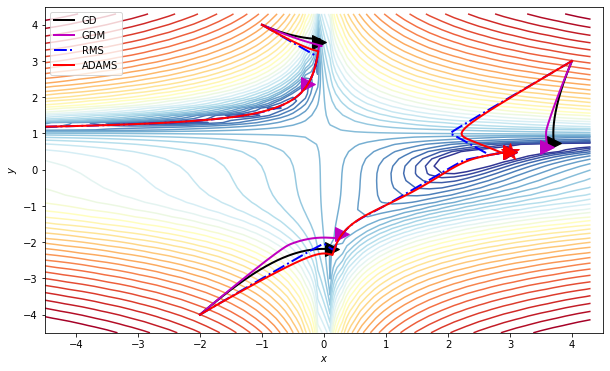

In [0]:
plt.close()

Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

noise=0


init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)

init2=np.array([-1,4])

gd_trajectory2=gd(grad_beales_function,init2,10**5, eta=lr_s, noise_strength=noise)
gdm_trajectory2=gd_with_mom(grad_beales_function,init2,10**5,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory2, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')

init3=np.array([-2,-4])

gd_trajectory3=gd(grad_beales_function,init3,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory3=gd_with_mom(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

plt.show()

#**Studio del GD e del GD + Momentum**

**Gradient Descent**

Consideriamo la funzione paraboloide e cerchiamo di individuare il minimo con l'algoritmo GD. Poniamoci, inizialmente, nel caso isotropo ($a=1$, $b=1$).

In [0]:
#definiamo una nuova funzione che implementi l'algoritmo GD che prenda come argomenti anche a e b
def newgd(grad, init, a, b, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params,a,b))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#funzione con minimo quadratico
def minima_surface(x,y,a=1.0,b=1.0):
    return a*x**2+b*y**2-1

#gradiente analitico
def grad_minima_surface(params,a=1.0,b=1.0):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]



#Estraiamo 4 punti iniziali, in modo da evidenziare eventuali differenze nella scelta dell'eta ottimale,
#e applichiamo la discesa lungo il gradiente partendo da tali punti. Stampiamo quindi la traiettoria seguita.
def random_init(gd, grad_function, eta1, epoch=100, size=2, a=1, b=1):
    init1=np.random.uniform(-4, 4, size)
    init2=np.random.uniform(-4, 4, size)
    init3=np.random.uniform(-4, 4, size)
    init4=np.random.uniform(-4, 4, size)
    gd_1=gd(grad_function,init1, a, b, n_epochs=epoch, eta=eta1)
    gd_2=gd(grad_function,init2, a, b, n_epochs=epoch, eta=eta1)
    gd_3=gd(grad_function,init3, a, b, n_epochs=epoch, eta=eta1)
    gd_4=gd(grad_function,init4, a, b, n_epochs=epoch, eta=eta1)
    print("Initial point =",init1,"\na =",a,"b =",b,"\nFinal gradient =",gd_1[-1:],"\n")
    print("Initial point =",init2,"\na =",a,"b =",b,"\nFinal gradient =",gd_2[-1:],"\n")
    print("Initial point =",init3,"\na =",a,"b =",b,"\nFinal gradient =",gd_3[-1:],"\n")
    print("Initial point =",init4,"\na =",a,"b =",b,"\nFinal gradient =",gd_4[-1:],"\n")
    overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
    overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta1,'b-<', lw=0.5)
    overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta1,'->', lw=0.5)
    overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta1,'c-o', lw=0.5)

#Definiamo, infine una funzione, presi in input il metodo da usare, la funzione gradiente, il
#punto iniziale, l'eta iniziale, l'eta finale, il passo, il numero di epoche e la tolleranza,
#selezioni il punto - o i punti - che, dopo il numero di epoche segnalato, hanno gradiente che
#che ha distanza da (0,0) inferiore alla tolleranza e stampi l'eta relativo
def besteta(axes1,method,grad_func,init,etamin,etamax,pace,epoch,tolerance,col='red',a=1,b=1):
    print('\nInit:', init, '\tColour =',col)
    print('a =', a, '\tb =', b)
    while etamin < etamax:
        etamin += pace       
        gdtry = method(grad_func, init, a = a, b = b, n_epochs = epoch, eta = etamin)
        rtry = (gdtry[-1,0]**2+gdtry[-1,1]**2)
        if rtry < tolerance :
            print("Best eta = ",etamin, '\n')
        axes1.scatter(etamin, rtry, c=col)


Init: [-1.47941437 -3.68411463] 	Colour = red
a = 1 	b = 1
Best eta =  0.5000000000000003 


Init: [ 3.39250948 -1.97053224] 	Colour = blue
a = 1 	b = 1
Best eta =  0.5000000000000003 


Init: [-1.83807893  3.00903617] 	Colour = pink
a = 1 	b = 1
Best eta =  0.5000000000000003 



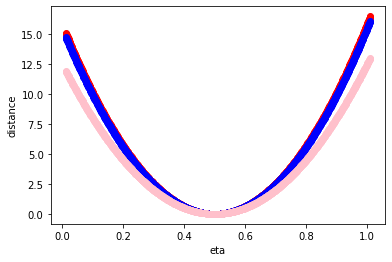

In [0]:
#Cerchiamo ora il migliore learning rate per GD, nel caso di un paraboloide isotropo
fig = plt.figure(figsize=(6.0, 4.0))
axes1 = fig.add_subplot(1, 1, 1)
axes1.set_ylabel('distance')
axes1.set_xlabel('eta')
init=np.random.uniform(-4, 4, 2)
besteta(axes1,newgd,grad_minima_surface,init,0.01,1.01,0.001,1,tolerance=10**(-10))
init=np.random.uniform(-4, 4, 2)
besteta(axes1,newgd,grad_minima_surface,init,0.01,1.01,0.001,1,tolerance=10**(-10),col='blue')
init=np.random.uniform(-4, 4, 2)
besteta(axes1,newgd,grad_minima_surface,init,0.01,1.01,0.001,1,tolerance=10**(-10),col='pink')

Osserviamo che una funzione isotropa non presenta direzioni preferenziali per la ricerca del minimo, ovvero il learning rate ottimale non dipende dal punto di partenza. Iterando l'algoritmo una sola volta (cioè utilizzando una sola epoca), il learning rate ottimale risulta essere $$\eta=0.5.$$

Passiamo ora alla verifica che, posto il learning rate pari a quello ottimale, la convergenza non dipenda dal punto di partenza.

Initial point = [ 1.20546865 -3.68412583] 
a = 1.0 b = 1.0 
Final gradient = [[0. 0.]] 

Initial point = [-1.98505438  3.50940926] 
a = 1.0 b = 1.0 
Final gradient = [[0. 0.]] 

Initial point = [-1.12397924 -3.44362712] 
a = 1.0 b = 1.0 
Final gradient = [[0. 0.]] 

Initial point = [-0.68140161  1.25188205] 
a = 1.0 b = 1.0 
Final gradient = [[0. 0.]] 



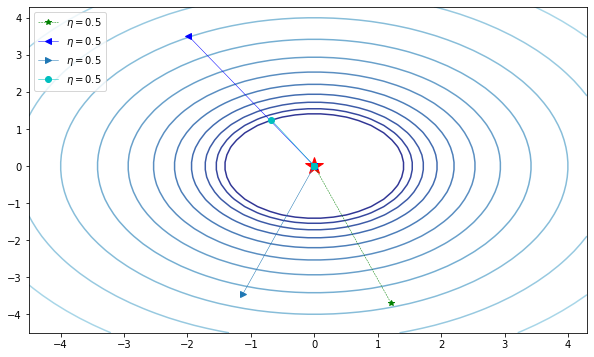

In [0]:
#Verifichiamo ora che la convergenza dell'algoritmo, nel caso isotropo, non dipenda dal punto di partenza
plt.close()
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))

a,b = 1.,1.
size = 2
eta1 = 0.5
epoch = 5

z=np.abs(minima_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)
random_init(newgd,grad_minima_surface,eta1,epoch,size,a,b)

plt.legend(loc=2)
plt.show()
fig.savefig("NB_GD_replot1.pdf", bbox_inches='tight')

Il learning rate ottimale permette di individuare il minimo partendo da un punto qualsiasi nel caso del paraboloide isotropo.

Tentiamo ora di inserire delle anisotropie e studiamo il comportamento dell'algoritmo in questo nuovo caso. Poniamo $a\neq b$, entrambi distribuiti uniformemente tra 1.01 e 2, e ripetiamo gli studi precedenti. Dapprima tentiamo di individuare un learning rate ottimale partendo dallo stesso punto.


Init: [3, 2] 	Colour = red
a = 1.7993190930738163 	b = 1.466441300874774

Init: [3, 2] 	Colour = black
a = 1.709391393393767 	b = 1.3900975890779566

Init: [3, 2] 	Colour = blue
a = 1.6918695723229913 	b = 1.6583793001045866
Best eta =  0.2930000000000002 

Best eta =  0.2940000000000002 

Best eta =  0.2950000000000002 

Best eta =  0.2960000000000002 

Best eta =  0.2970000000000002 

Best eta =  0.2980000000000002 

Best eta =  0.2990000000000002 

Best eta =  0.3000000000000002 

Best eta =  0.3010000000000002 

Best eta =  0.3020000000000002 


Init: [3, 2] 	Colour = pink
a = 1.9092415069782747 	b = 1.3397814182652132


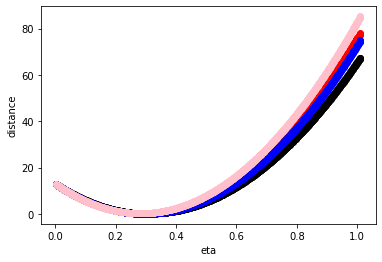

In [0]:
#Per studiare il caso anisotropo, estraiamo due numeri casuali a e b distribuiti uniformemente tra 1.01 e 2
fig = plt.figure(figsize=(6.0, 4.0))
axes1 = fig.add_subplot(1, 1, 1)
axes1.set_ylabel('distance')
axes1.set_xlabel('eta')
i=0
init=[3,2]
colour = ['red','black','blue','pink']
while i < 4:
    a=1.01+np.random.random()
    b=1.01+np.random.random()
    besteta(axes1,newgd, grad_minima_surface, init, etamin = 0.001,etamax = 1.01,pace = 0.001,epoch = 1, tolerance=0.005, a = a, b = b,col=colour[i])
    i+=1

#init=np.random.uniform(-4,4,2)

Notiamo che, pur avendo impostato lo stesso punto di partenza, ciascuna iterazione presenti un valore di $eta$ ottimale diverso. In effetti, non ci aspettiamo che il learning rate ottimale sia lo stesso per tutti i paraboloidi isotropi.

Fissiamo ora $a$ e $b$, ovvero estraiamoli una sola volta, e fissiamo un valore del learning rate (utilizzeremo quello ottimale per il caso isotropo per confrontare i risultati). Studiamo ora la convergenza dell'algoritmo al variare del punto di partenza.

Initial point = [1.34418489 2.29744317] 
a = 1.2883422327060097 b = 1.5632494593198651 
Final gradient = [[-0.00267917 -0.13024129]] 

Initial point = [2.70463066 2.9584652 ] 
a = 1.2883422327060097 b = 1.5632494593198651 
Final gradient = [[-0.00539075 -0.16771441]] 

Initial point = [-2.99883255 -2.5080341 ] 
a = 1.2883422327060097 b = 1.5632494593198651 
Final gradient = [[0.00597714 0.14217962]] 

Initial point = [-3.628444   -1.33586458] 
a = 1.2883422327060097 b = 1.5632494593198651 
Final gradient = [[0.00723205 0.07572972]] 



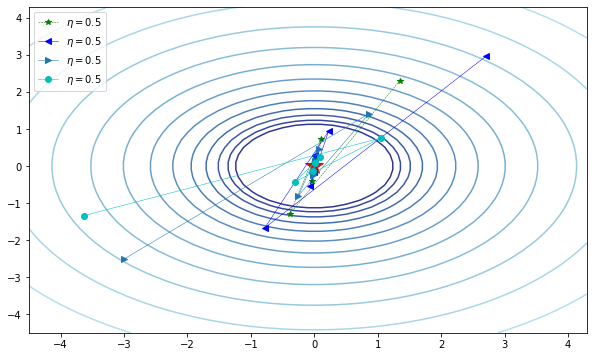

In [0]:
#Cerchiamo di individuare dei punti preferenziali dai quali partire per individuare il minimo nel caso anisotropo
plt.close()
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))

size = 2
eta1 = 0.5
epoch = 5
a=1.01+np.random.random()
b=1.01+np.random.random()

z=np.abs(minima_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)
random_init(newgd,grad_minima_surface,eta1,epoch,size,a,b)

plt.legend(loc=2)
plt.show()
fig.savefig("NB_GD_replot2.pdf", bbox_inches='tight')

Si registra comunque una convergenza, nonostante questa sia ora meno precisa.

Interessiamoci ora alla funzione di Beale.

In [0]:
#funzione di Beale
def beales_function(x,y):
    return np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

#gradiente analitico
def new_grad_beales_function(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def new_random_init(gd, grad_function, eta1, epoch=100, size=2, a=1, b=1):
    init1=np.random.uniform(-4, 4, size)
    init2=np.random.uniform(-4, 4, size)
    init3=np.random.uniform(-4, 4, size)
    init4=np.random.uniform(-4, 4, size)
    gd_1=gd(grad_function,init1, a, b, n_epochs=epoch, eta=eta1)
    gd_2=gd(grad_function,init2, a, b, n_epochs=epoch, eta=eta1)
    gd_3=gd(grad_function,init3, a, b, n_epochs=epoch, eta=eta1)
    gd_4=gd(grad_function,init4, a, b, n_epochs=epoch, eta=eta1)
    print("Initial point =",init1,"\nFinal gradient =",gd_1[-1:],"\n")
    print("Initial point =",init2,"\nFinal gradient =",gd_2[-1:],"\n")
    print("Initial point =",init3,"\nFinal gradient =",gd_3[-1:],"\n")
    print("Initial point =",init4,"\nFinal gradient =",gd_4[-1:],"\n")
    overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
    overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta1,'b-<', lw=0.5)
    overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta1,'->', lw=0.5)
    overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta1,'c-o', lw=0.5)
    
#best eta 
def new_besteta(axes1,method,grad_func,init,etamin,etamax,pace,epoch,tolerance,col='red',a=1,b=1):
    print('\nInit:', init, '\tColour =',col)
    while etamin < etamax:
        etamin += pace       
        gdtry = method(grad_func, init, a = a, b = b, n_epochs = epoch, eta = etamin)
        rtry = (gdtry[-1,0]**2+gdtry[-1,1]**2)
        if rtry < tolerance :
            print("Best eta =",etamin, '\n')
        axes1.scatter(etamin, rtry, c=col)

Initial point = [-3.22015404  1.13060881] 
Final gradient = [[-3.33522848  1.23994042]] 

Initial point = [0.23939843 2.1313577 ] 
Final gradient = [[-1.06253012  1.57050245]] 

Initial point = [-0.98300166 -3.95436126] 
Final gradient = [[ 0.04247298 -3.62084281]] 

Initial point = [3.40730929 2.09726274] 
Final gradient = [[3.25559863 0.55721996]] 



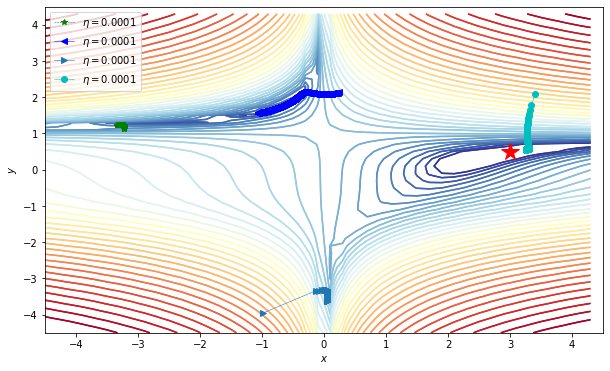

In [0]:
#Studiamo il comportamento di GD nel caso della funzione di Beale

plt.close()
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = contour_beales_function()
z=np.abs(beales_function(x,y))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")

eta1=0.0001
epoch=10000
new_random_init(newgd,new_grad_beales_function,eta1,epoch,size)
plt.legend(loc=2)

Come ci si attendeva, l'algoritmo fallisce: nessuno dei ptentativi riesce ad individuare con la giusta accuratezza il punto di minimo globale, nonostante il learning rate basso ($\eta=10^{-4}$) e l'elevato numero di epoche ($10^4$). Inoltre, alcune traiettorie rimangono intrappolate nelle regioni dei minimi locali.

Cerchiamo di ricavare una stima del miglior learning rate associato a questa funzione, al fine di ottimizzare la convergenza dell'algoritmo.

Graph 1

Init: [ 2.29528145 -1.44261948] 	Colour = red

Init: [ 3.75275076 -0.78099395] 	Colour = black

Init: [ 0.36927768 -3.22561139] 	Colour = blue

Init: [ 1.69264116 -3.74924496] 	Colour = pink


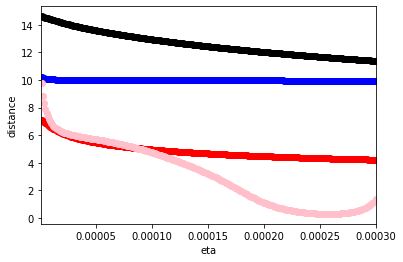

In [0]:
#Cerchiamo un migliore learning rate per la funzione di Beale
fig = plt.figure(figsize=(6.0, 4.0))
axes1 = fig.add_subplot(1, 1, 1)
eta1=0.000001
eta2=0.0003
passo=0.000001
axes1.set_xlim(eta1,eta2)
axes1.set_ylabel('distance')
axes1.set_xlabel('eta')
i=0

colour = ['red','black','blue','pink']
print('Graph 1')
while i < 4:
    init1=np.random.uniform(-4,4,2)
    new_besteta(axes1,newgd, new_grad_beales_function, init1, etamin = eta1,etamax = eta2,pace = passo,epoch = 100, tolerance=10**(-10), a = 1., b = 1.,col=colour[i])
    i+=1

Come si evince dal grafico, sussiste una forte dipendenza del learning rate ottimale dal punto di partenza dell'algoritmo. Concludiamo che il GD semplice non sia sufficiente per trattare funzioni come quella di Beale.

Come ultima analisi, consideriamo la funzione presentante il punto di sella.

In [0]:
#funzione con punto di sella
def saddle_surface(x,y,a=1,b=1):
    return a*x**2-b*y**2

#gradiente analitico
def grad_saddle_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= -2*b*y
    return [grad_x,grad_y]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Log scale: values of z <= 0 have been masked
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  


Initial point = [2.8546957  3.65469186] 
a = 1.0 b = 1.0 
Final gradient = [[1.56640813 6.65808466]] 

Initial point = [ 0.07241869 -2.29764022] 
a = 1.0 b = 1.0 
Final gradient = [[ 0.03973706 -4.18582023]] 

Initial point = [-1.95865368 -0.44674519] 
a = 1.0 b = 1.0 
Final gradient = [[-1.07473838 -0.81387637]] 

Initial point = [-1.83283519 -2.9514063 ] 
a = 1.0 b = 1.0 
Final gradient = [[-1.00570016 -5.37684537]] 



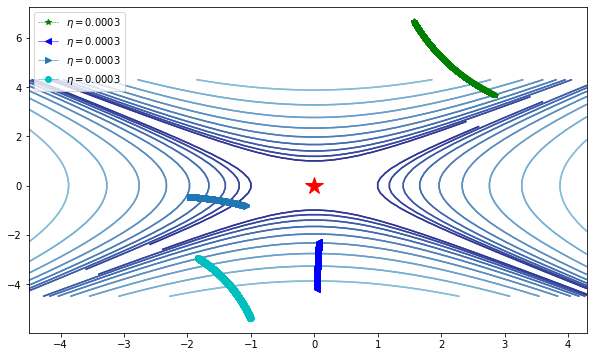

In [0]:
#Studiamo eventuali dipendenze della convergenza dal punto di partenza
plt.close()
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=np.abs(saddle_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")

a,b=1.,1.
size = 2
eta1 = 0.0003
epoch = 1000

z=np.abs(saddle_surface(x,y,a,b))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)
random_init(newgd,grad_saddle_surface,eta1,epoch,size,a,b)

plt.legend(loc=2)
plt.show()
fig.savefig("NB_GD_replot3.pdf", bbox_inches='tight')


Init: [ 2.08798382 -1.10885936] 	Colour = red
a = 1 	b = 1

Init: [-3.28068781  0.67862641] 	Colour = blue
a = 1 	b = 1

Init: [-0.81724633  1.95715024] 	Colour = pink
a = 1 	b = 1


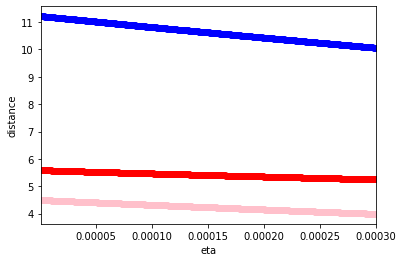

In [0]:
#Cerchiamo il miglior learning rate per la funzione con il punto di sella
fig = plt.figure(figsize=(6.0, 4.0))
axes1 = fig.add_subplot(1, 1, 1)
axes1.set_ylabel('distance')
axes1.set_xlabel('eta')
axes1.set_xlim(0.000001,0.0003)
init=np.random.uniform(-4, 4, 2)
besteta(axes1,newgd,grad_saddle_surface,init,0.000001,0.0003,0.000001,100,tolerance=10**(-10))
init=np.random.uniform(-4, 4, 2)
besteta(axes1,newgd,grad_saddle_surface,init,0.000001,0.0003,0.000001,100,tolerance=10**(-10),col='blue')
init=np.random.uniform(-4, 4, 2)
besteta(axes1,newgd,grad_minima_surface,init,0.000001,0.0003,0.000001,100,tolerance=10**(-10),col='pink')

La funzione con il punto di sella non si presta ad essere studiata con il nostro algoritmo di discesa lungo il gradiente. Il punto di sella è infatti un punto di minimo solo per una particolare curva giacente sulla superficie individuata dalla funzione. In tutti gli altri casi, l'algoritmo, che sta cercando un punto di minimo, procede verso $-\infty$.

**Gradient Descent with Momentum**

Riproponiamo ora gli studi compiuti in precedenza utilizzando il GD with momentum. Ci interessiamo, in una prima fase al paraboloide, sia nel caso isotropo, sia in quello anisotropo.

In [0]:
#Definiamo le funzioni che implementano il nuovo algoritmo GD+momentum
def newgd_with_mom(grad, init, a, b, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params,gamma,a,b))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#gradiente analitico
def grad_minima_surface_mom(params,gamma,a=1.0,b=1.0):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]

#gradiente analitico
def grad_beales_function_mom(params,gamma,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def besteta_mom(axes1,method,grad_func,init,etamin,etamax,pace,epoch,tolerance,gamma=0.9,col='red',a=1,b=1):
    print('\nInit:', init, '\tColour =',col)
    while etamin < etamax:
        etamin += pace       
        gdtry = method(grad_func, init, a = a, b = b, n_epochs = epoch, eta = etamin, gamma = gamma)
        rtry = (gdtry[-1,0]**2+gdtry[-1,1]**2)
        if rtry < tolerance :
            print("Best eta =",etamin, '\n')
        axes1.scatter(etamin, rtry, c=col)


Init: [1.08700409 0.75541263] 	Colour = red
Best eta = 0.04800000000000003 

Best eta = 0.33500000000000024 

Best eta = 0.33600000000000024 

Best eta = 0.33700000000000024 

Best eta = 0.8190000000000006 

Best eta = 0.8200000000000006 

Best eta = 0.8210000000000006 


Init: [1.08700409 0.75541263] 	Colour = red
a = 1 	b = 1
Best eta =  0.5000000000000003 


Init: [-0.09113546  0.54569792] 	Colour = blue
Best eta = 0.04700000000000003 

Best eta = 0.04800000000000003 

Best eta = 0.04900000000000003 

Best eta = 0.33400000000000024 

Best eta = 0.33500000000000024 

Best eta = 0.33600000000000024 

Best eta = 0.33700000000000024 

Best eta = 0.33800000000000024 

Best eta = 0.33900000000000025 

Best eta = 0.8180000000000006 

Best eta = 0.8190000000000006 

Best eta = 0.8200000000000006 

Best eta = 0.8210000000000006 

Best eta = 0.8220000000000006 

Best eta = 0.8230000000000006 


Init: [-0.09113546  0.54569792] 	Colour = blue
a = 1 	b = 1
Best eta =  0.5000000000000003 


Init

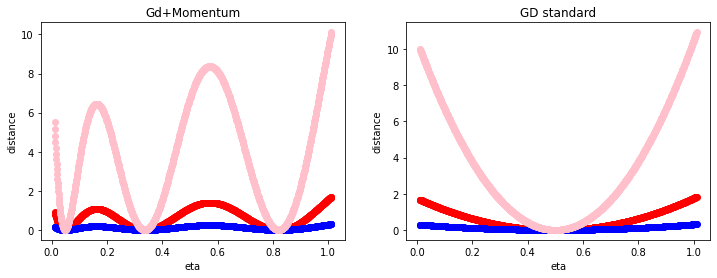

In [0]:
#Cerchiamo il miglior eta per il paraboloide isotropo
fig = plt.figure(figsize=(12.0, 4.0))
axes1 = fig.add_subplot(1, 2, 1)
axes1.set_ylabel('distance')
axes1.set_xlabel('eta')
axes1.set_title('Gd+Momentum')
axes2 = fig.add_subplot(1, 2, 2)
axes2.set_ylabel('distance')
axes2.set_xlabel('eta')
axes2.set_title('GD standard')
init=np.random.uniform(-4, 4, 2)
besteta_mom(axes1,newgd_with_mom,grad_minima_surface_mom,init,0.01,1.01,0.001,5,tolerance=10**(-4))
besteta(axes2,newgd,grad_minima_surface,init,0.01,1.01,0.001,1,tolerance=10**(-10))
init=np.random.uniform(-4, 4, 2)
besteta_mom(axes1,newgd_with_mom,grad_minima_surface_mom,init,0.01,1.01,0.001,5,tolerance=10**(-4), col='blue')
besteta(axes2,newgd,grad_minima_surface,init,0.01,1.01,0.001,1,tolerance=10**(-10),col='blue')
init=np.random.uniform(-4, 4, 2)
besteta_mom(axes1,newgd_with_mom,grad_minima_surface_mom,init,0.01,1.01,0.001,5,tolerance=10**(-4), col='pink')
besteta(axes2,newgd,grad_minima_surface,init,0.01,1.01,0.001,1,tolerance=10**(-10),col='pink')

Nel caso isotropo, impostando $\gamma=0.9$, si individua più di un valore ottimale per il learning rate (indipendentemente dal punto di partenza), presumibilmente a causa della simmetria radiale del paraboloide.

Passiamo ora al caso anisotropo, con $a$ e $b$ estratti ancora una volta casualmente e fissando il punto iniziale.


a =  6.88733042334643  b =  0.837372755646526 
Graph 1

Valori gamma: 
rosso = 0.0 
nero = 0.3 
blu = 0.6 
rosa = 0.9

Init: [-2, 2.6] 	Colour = red

Init: [-2, 2.6] 	Colour = black

Init: [-2, 2.6] 	Colour = blue

Init: [-2, 2.6] 	Colour = pink
Graph 2

Init: [-2, 2.6] 	Colour = red

Init: [-2, 2.6] 	Colour = black

Init: [-2, 2.6] 	Colour = blue

Init: [-2, 2.6] 	Colour = pink


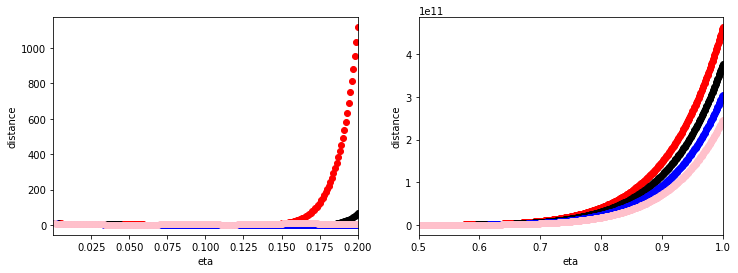

In [0]:
fig = plt.figure(figsize=(12.0, 4.0))
eta1=0.0001
eta2=0.2
passo=0.001
axes1 = fig.add_subplot(1, 2, 1)
axes1.set_ylabel('distance')
axes1.set_xlabel('eta')
axes1.set_xlim(eta1,eta2)
eta3=0.5
eta4=1.0
passo=0.001
axes2 = fig.add_subplot(1, 2, 2)
axes2.set_ylabel('distance')
axes2.set_xlabel('eta')
axes2.set_xlim(eta3,eta4)
i=0
gamma = [0.,0.3,0.6,0.9]
colour = ['red','black','blue','pink']
init = [-2,2.6]
a = 10*np.random.random()
b = 10*np.random.random()

print('\na = ',a, ' b = ',b,'\nGraph 1')
print('\nValori gamma: \nrosso =',gamma[0],'\nnero =', gamma[1], '\nblu =',gamma[2],'\nrosa =',gamma[3])
while i < 4:
    besteta_mom(axes1,newgd_with_mom, grad_minima_surface_mom, init, etamin = eta1,etamax = eta2,pace = passo,epoch = 5, tolerance=10**(-10),gamma=gamma[i], a = a, b = b,col=colour[i])
    i+=1
    
i=0
print('Graph 2')
while i < 4:
    besteta_mom(axes2,newgd_with_mom, grad_minima_surface_mom, init, etamin = eta3,etamax = eta4,pace = passo,epoch = 5, tolerance=10**(-10),gamma=gamma[i], a = a, b =b,col=colour[i])
    i+=1

Osserviamo che, aumentando il valore di $\gamma$, possiamo permetterci di aumentare anche il valore del learning rate, ottenendo risultati accettabili anche per un numero di epoche basso.

Passiamo all'analisi della funzione di Beale.

In [0]:
#Cerchiamo un learning rate ottimale per la funzione di Beale
def random_init_mom(gd, grad_function, eta1, gamma, epoch=100, size=2, a=1, b=1):
    init1=np.random.uniform(-4, 4, size)
    init2=np.random.uniform(-4, 4, size)
    init3=np.random.uniform(-4, 4, size)
    init4=np.random.uniform(-4, 4, size)
    gd_1=gd(grad_function,init1, a, b, n_epochs=epoch, eta=eta1,gamma=gamma)
    gd_2=gd(grad_function,init2, a, b, n_epochs=epoch, eta=eta1,gamma=gamma)
    gd_3=gd(grad_function,init3, a, b, n_epochs=epoch, eta=eta1,gamma=gamma)
    gd_4=gd(grad_function,init4, a, b, n_epochs=epoch, eta=eta1,gamma=gamma)
    print("Initial point =",init1,"\nFinal gradient =",gd_1[-1:],"\n")
    print("Initial point =",init2,"\nFinal gradient =",gd_2[-1:],"\n")
    print("Initial point =",init3,"\nFinal gradient =",gd_3[-1:],"\n")
    print("Initial point =",init4,"\nFinal gradient =",gd_4[-1:],"\n")
    overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
    overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta1,'b-<', lw=0.5)
    overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta1,'->', lw=0.5)
    overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta1,'c-o', lw=0.5)

#colour = ['red','black','blue','pink']
#print('Graph 1')
#while i < 4:
#    init1=np.random.uniform(-4,4,2)
#    best_eta_bis(axes1,gd_bis, grad_beales_function_bis, init1, etamin = eta1,etamax = eta2,pace = passo,epoch = 100, tolerance=10**(-10), a = 1., b = 1.,col=colour[i])
#    i+=1
#print('Graph 2')
#while i < 4:
#    init1=np.random.uniform(-4,4,2)
#    best_eta_bis(axes1,gd_bis, grad_beales_function_bis, init1, etamin = eta1,etamax = eta2,pace = passo,epoch = 100, tolerance=10**(-10), a = 1., b = 1.,col=colour[i])
#    i+=1
    

Initial point = [-1.77161738 -2.62085423] 
Final gradient = [[2.98125832 0.49528368]] 

Initial point = [-3.5643741  -2.95971759] 
Final gradient = [[-3.08210272  1.2560121 ]] 

Initial point = [2.18084353 3.97971587] 
Final gradient = [[2.98205342 0.49548534]] 

Initial point = [ 1.06861646 -0.88638078] 
Final gradient = [[2.98149552 0.49534386]] 



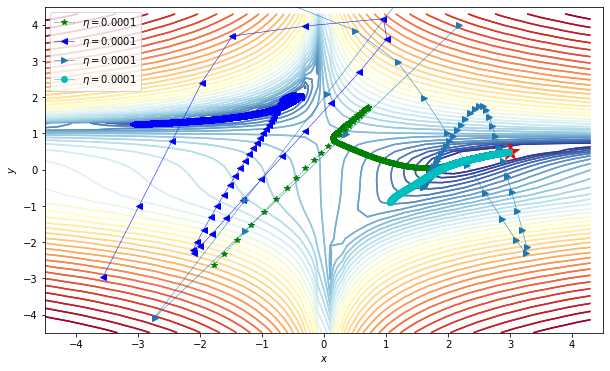

In [0]:
#Verifichiamo anzitutto che si riesca a giungere ad una convergenza
plt.close()
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = contour_beales_function()
z=np.abs(beales_function(x,y))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")

eta1=0.0001
epoch=10000
gamma = 0.9
random_init_mom(newgd_with_mom,grad_beales_function_mom,eta1,gamma,epoch,size=2)
plt.legend(loc=2)

Neanche applicando il GD with momentum riusciamo con certezza ad individuare il minimo della funzione di Beale. Diverse traiettorie, infatti rimanangono ancora intrappolate in regioni corrispondenti a minimi locali.

#**Studio degli algoritmi RMSProp e ADAM**

Testiamo gli algoritmi RMSProp e ADAM con diversi valori del learning rate, applicando gli algoritmi alla funzione di Beale.

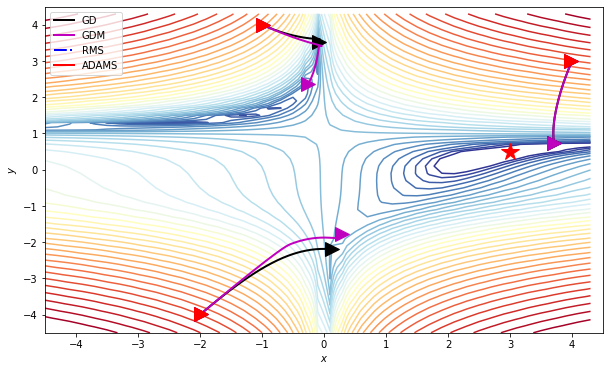

In [0]:
plt.close()

Nsteps=10**4
lr_l=10**-6
lr_s=10**-6

noise=0


init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)

init2=np.array([-1,4])

gd_trajectory2=gd(grad_beales_function,init2,10**5, eta=lr_s, noise_strength=noise)
gdm_trajectory2=gd_with_mom(grad_beales_function,init2,10**5,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory2, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')

init3=np.array([-2,-4])

gd_trajectory3=gd(grad_beales_function,init3,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory3=gd_with_mom(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

plt.show()

Partendo da un learning rate $\eta=10^{-6}$ per ADAM e RMSProp, i passi compiuti dall'algoritmo risultano da subito molto corti, cosicché la traiettoria non compie complessivamente alcun passo verso il minimo. Possiamo spiegare questa osservazione mediante le caratteristiche stesse dei due algoritmi, che sono progettati per compiere passi più lunghi nelle regioni più piatte e passi più corti nelle regioni più ripide. Occorre perciò impostare un learning rate di partenza più elevato.

Proviamo ora ad inserire del rumore negli algoritmi.

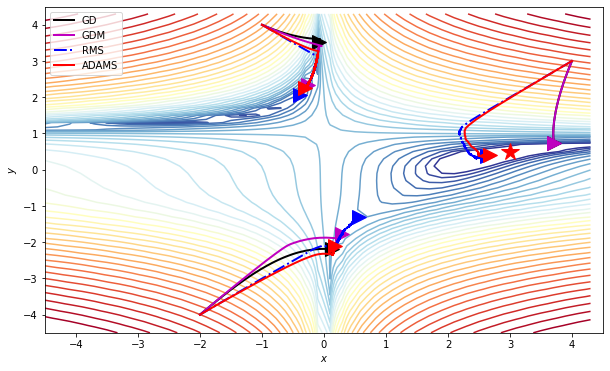

In [0]:
plt.close()

Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

noise=10


init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)

init2=np.array([-1,4])

gd_trajectory2=gd(grad_beales_function,init2,10**5, eta=lr_s, noise_strength=noise)
gdm_trajectory2=gd_with_mom(grad_beales_function,init2,10**5,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory2, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')

init3=np.array([-2,-4])

gd_trajectory3=gd(grad_beales_function,init3,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory3=gd_with_mom(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

plt.show()

Osserviamo che, aggiungendo il rumore, anche i RMSProp e ADAM falliscono nel tentativo di individuare il minimo. Un vantaggio derivante dalla sua introduzione però, riguarda la capacità degli algoritmi di fuoriuscire dalle regioni dei minimi locali.

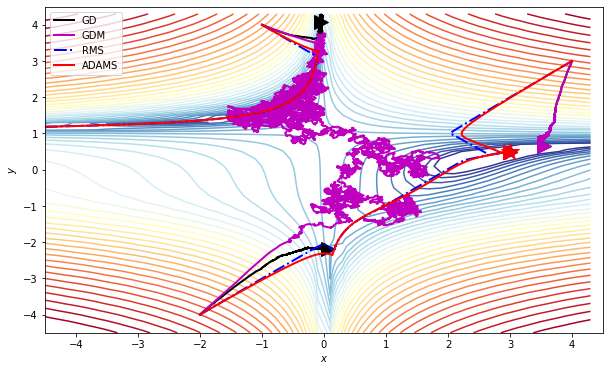

In [0]:
plt.close()

Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

noise=0
noise1=1000

init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=noise1)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise1)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)

init2=np.array([-1,4])

gd_trajectory2=gd(grad_beales_function,init2,10**5, eta=lr_s, noise_strength=noise1)
gdm_trajectory2=gd_with_mom(grad_beales_function,init2,10**5,eta=lr_s, gamma=0.9,noise_strength=noise1)
rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory2, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')

init3=np.array([-2,-4])

gd_trajectory3=gd(grad_beales_function,init3,Nsteps, eta=lr_s, noise_strength=noise1)
gdm_trajectory3=gd_with_mom(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise1)
rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=noise)
adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

plt.show()

La caratteristica è tanto più accentuata quanto più è alto il valore del rumore inserito. Questo avviene a causa della natura aleatoria del rumore, ma il prezzo da pagare in termini di risultati è troppo elevato, in quanto anche le traiettorie che, in assenza di rumore, permettevano di raggiungere il minimo perdono tale qualità.

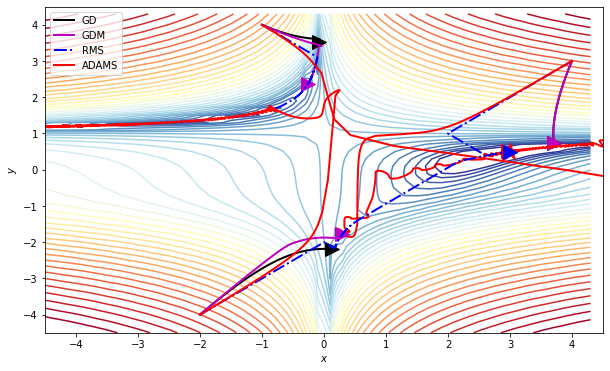

In [0]:
plt.close()

Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

noise=0


init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.1,epsilon=10**-8,noise_strength=noise)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.11,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)

init2=np.array([-1,4])

gd_trajectory2=gd(grad_beales_function,init2,10**5, eta=lr_s, noise_strength=noise)
gdm_trajectory2=gd_with_mom(grad_beales_function,init2,10**5,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=lr_l, beta=0.1,epsilon=10**-8,noise_strength=noise)
adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=lr_l, gamma=0.9, beta=0.11,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory2, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')

init3=np.array([-2,-4])

gd_trajectory3=gd(grad_beales_function,init3,Nsteps, eta=lr_s, noise_strength=noise)
gdm_trajectory3=gd_with_mom(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=noise)
rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.1,epsilon=10**-8,noise_strength=noise)
adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.11,epsilon=10**-8,noise_strength=noise)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

plt.show()

Infine, modificando profondamente i valori di $\beta_1$ e $\beta_2$ (rispettivamente 0.1 e 0.11), la prestazione di ADAM peggiora notevolemente, divenendo inferiore ad RMSProp.